<a href="https://colab.research.google.com/github/Shraddha-Ramteke/Data-Analysis-for-Python/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Data Cleaning**
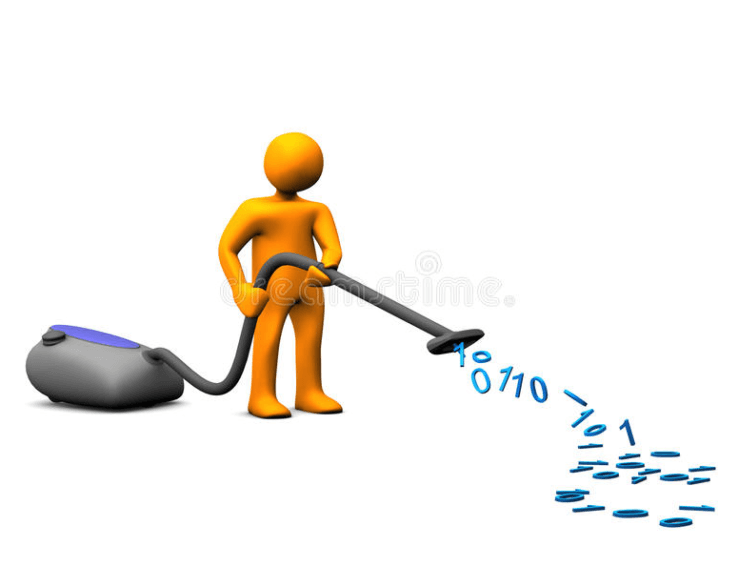

# Cleaning not-null values
After dealing with many datasets I can tell you that "missing data" is not such a big deal. The best thing that can happen is to clearly see values like np.nan. The only thing you need to do is just use methods like isnull and fillna/dropna and pandas will take care of the rest.

But sometimes, you can have invalid values that are not just "missing data" (None, or nan). For example:

# Hands on!

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


# The previous DataFrame doesn't have any "missing value", but clearly has invalid data. 290 doesn't seem like a valid age, and D and ? don't correspond with any known sex category. How can you clean these not-missing, but clearly invalid values then?



# Finding Unique Values
The first step to clean invalid values is to notice them, then identify them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set ('M', 'F')), we start by analyzing the variety of values present. For that, we use the unique() method:

In [3]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [4]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

Clearly if you see values like 'D' or '?', it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that 'D' was a typo and it should actually be F. You can use the replace function to replace these values:



In [5]:
df['Sex'].replace('D', 'F')


0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few 'N's, that should actually be 'M's:



In [6]:
df['Sex'].replace({'D': 'F', 'N': 'M'})


0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [7]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, 150 > 15, 490 > 49).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for our dataset. We can then combine boolean selection with the operation:

In [8]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


And we can now just divide by 10:

In [9]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


# Duplicates
Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:

In [10]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [11]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are duplicated (that will tell you which values are duplicates) and drop_duplicates (which will just get rid of duplicates):

In [12]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case duplicated didn't consider 'Kim Darroch', the first instance of the United Kingdom or 'Peter Wittig' as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the keep parameter:

In [13]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", 'Kim Darroch' and 'Peter Wittig' (the first ambassadors of their countries) are considered duplicates, but 'Peter Westmacott' and 'Klaus Scharioth' are not duplicates. You can also choose to mark all of them as duplicates with keep=False:

In [14]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is drop_duplicates, which just excludes the duplicated values and also accepts the keep parameter:

In [15]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [16]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [17]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

# Duplicates in DataFrames
Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [18]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that Kobe is duplicated; but he appears with two different positions. What does duplicated say?

In [19]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Again, conceptually, "duplicated" means "all the column values should be duplicates". We can customize this with the subset parameter:

In [20]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

And the same rules of keep still apply:

In [21]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [22]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [23]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [24]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


# Text Handling
Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

# Splitting Columns
The result of a survey is loaded and this is what you get:

In [25]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


You know that the single columns represent the values "year, Sex, Country and number of children", but it's all been grouped in the same column and separated by an underscore. Pandas has a convenient method named split that we can use in these situations:



In [26]:
df['Data'].str.split('_')


0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [27]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [28]:
df = df['Data'].str.split('_', expand=True)

In [29]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

You can also check which columns contain a given value with the contains method:

In [30]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [31]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [32]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [33]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [34]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [35]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

ut, be warned:

Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.

As you can see, all these string/text-related operations are applied over the str attribute of the series. That's because they have a special place in Series handling and you can read more about it here.